In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/home/joyvan/data/train.csv', header=0)

In [3]:
test_df = pd.read_csv('/home/joyvan/data/test.csv', header=0)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
 test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Populating the interactive namespace from numpy and matplotlib


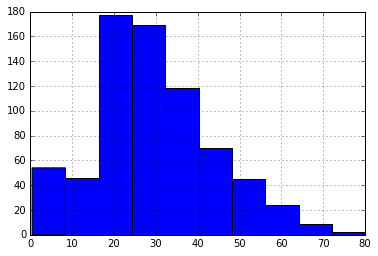

In [8]:
%pylab inline
train_df.Age.hist()

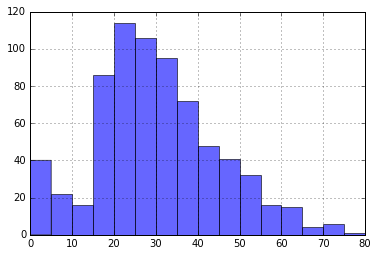

In [9]:
train_df.Age.dropna().hist(bins=16, range=(0,80), alpha=0.6)

In [10]:
def add_feature_fields(df):
    df['FamilySize'] = df.SibSp + df.Parch # new feature
    df['Gender'] = df.Sex.map({'female': 0, 'male': 1}).astype(int) # transform type
    df['AgeIsNull'] = pd.isnull(df.Age).astype(int) 
    df['AgeFill'] = df['Age']
    df['CabinHexId'] = df['Cabin']
    df['EmbID'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 3})
    df.loc[ df['EmbID'].isnull(), 'EmbID'] = -1
    df.loc [ (df.CabinHexId.isnull()), 'CabinHexId'] = '0'
    df.CabinHexId = df.CabinHexId.map( lambda s: np.fromiter([int(x, 36) for x in s.split()], int).mean())
    return df
    
    
    

In [11]:
def add_dependent_feature_fields(df, median_ages):
    for i in range(0,2):
        for j in range(0,3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1), 'AgeFill'] = median_ages[i, j]
    
    df['Age*Class'] = df.AgeFill * df.Pclass # new features
    return df

In [12]:
def drop_non_numerics(df):
    df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1)
    df.loc[ df.Fare.isnull(), 'Fare' ] = -1
    return df

In [13]:
def compute_median_age_by_gender_and_class(df):
    median_ages = np.zeros((2,3))
    for i in range(0, 2):
        for j in range(0,3):
            median_ages[i, j] = df[(df['Gender'] == i) & (df.Pclass == j + 1)]['Age'].dropna().median()
    return median_ages

In [14]:
train_df = add_feature_fields(train_df)
median_ages = compute_median_age_by_gender_and_class(train_df)
train_df = add_dependent_feature_fields(train_df, median_ages)
train_df = drop_non_numerics(train_df)

In [15]:
test_df = add_feature_fields(test_df)
test_df = add_dependent_feature_fields(test_df, median_ages)
test_df = drop_non_numerics(test_df)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
FamilySize    891 non-null int64
Gender        891 non-null int64
AgeIsNull     891 non-null int64
AgeFill       891 non-null float64
CabinHexId    891 non-null float64
EmbID         891 non-null float64
Age*Class     891 non-null float64
dtypes: float64(5), int64(7)
memory usage: 90.5 KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
FamilySize    418 non-null int64
Gender        418 non-null int64
AgeIsNull     418 non-null int64
AgeFill       418 non-null float64
CabinHexId    418 non-null float64
EmbID         418 non-null int64
Age*Class     418 non-null float64
dtypes: float64(4), int64(7)
memory usage: 39.2 KB


In [18]:
train_data = train_df.values

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
FamilySize    891 non-null int64
Gender        891 non-null int64
AgeIsNull     891 non-null int64
AgeFill       891 non-null float64
CabinHexId    891 non-null float64
EmbID         891 non-null float64
Age*Class     891 non-null float64
dtypes: float64(5), int64(7)
memory usage: 90.5 KB


In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data[0::, 1::], train_data[0::,0])

In [21]:
test_data = test_df.values

In [22]:
output = forest.predict(test_data)

In [23]:
output

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [36]:
import csv
def write_out_results(prediction_output):
    fieldnames = ['PassengerId', 'Survived']
    with open('/home/joyvan/data/includes_hex_id_for_cabin.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i, pid in enumerate(pd.read_csv('/home/joyvan/data/test.csv', header=0).PassengerId):
            writer.writerow(dict(zip(fieldnames, (pid, int(output[i])))))

In [37]:
write_out_results(output)